[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fwzOxZegvMNCLoWi23DGB25SpSUiQ64b?usp=sharing)

## Import Libraries

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Define Functions for Loading and Displaying Images

In [ ]:
# Function to load and display images
def load_and_display_images(file_paths, num_images=5, photos_folder_path=''):
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, file in enumerate(file_paths[:num_images]):
        img_path = os.path.join(photos_folder_path, file)
        with Image.open(img_path) as img:
            img_array = np.array(img)
            if img_array.dtype != np.uint8:
                img_array = (img_array * 255).astype(np.uint8)
            axs[i].imshow(img_array)
            axs[i].set_title(f"Size: {img_array.shape}")
            axs[i].axis('off')

## Define Function for Preprocessing Images

In [ ]:
# Function to preprocess images
def preprocess_images(file_paths, resized_dimension=(64, 42), photos_folder_path=''):
    processed_images = []
    for file in file_paths:
        img_path = os.path.join(photos_folder_path, file)
        with Image.open(img_path) as img:
            resized_img = img.convert('RGB').resize(resized_dimension)
            normalized_img = np.array(resized_img, dtype=np.float32) / 255.0
            flattened_img = normalized_img.flatten()
            processed_images.append(flattened_img)
    return np.array(processed_images, dtype=np.float32)

## Define Function for K-Means Clustering in Batches

In [ ]:
# Function to perform K-means clustering in batches
def cluster_in_batches(processed_images, batch_size, k_clusters):
    num_batches = len(processed_images) // batch_size + (len(processed_images) % batch_size > 0)
    all_clusters = []
    for i in range(num_batches):
        batch_clusters = KMeans(n_clusters=k_clusters, random_state=42).fit_predict(processed_images[i * batch_size:(i + 1) * batch_size])
        all_clusters.extend(batch_clusters)
    return all_clusters

## Define Function for PCA and Visualization

In [ ]:
# Function for PCA and visualization
def pca_and_visualize(processed_images, clusters):
    pca = PCA(n_components=2)
    reduced_data_pca = pca.fit_transform(processed_images)
    plt.figure(figsize=(10, 8))
    for cluster in range(max(clusters) + 1):
        cluster_data_pca = reduced_data_pca[np.array(clusters) == cluster]
        plt.scatter(cluster_data_pca[:, 0], cluster_data_pca[:, 1], label=f'Cluster {cluster}')
    plt.title('PCA Clustering of Image Dataset')
    plt.xlabel('PCA feature 1')
    plt.ylabel('PCA feature 2')
    plt.legend()
    plt.show()

## Main Execution

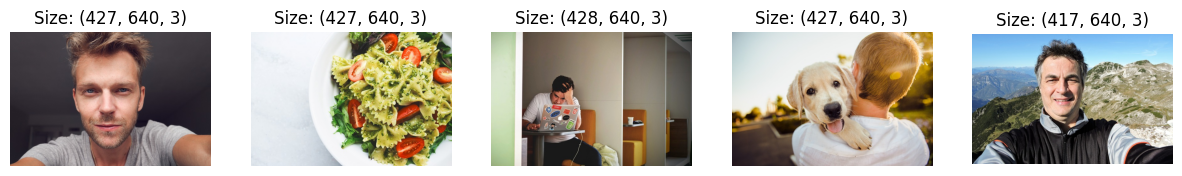

In [ ]:
# Main execution

# File path for the uploaded zip file
zip_file_path = '/content/h.zip'
extract_folder_path = '/content/h/'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_path)

photos_folder_path = '/content/h/photos_no_class'

file_paths = os.listdir(photos_folder_path)  # List of file names in the images folder

# Load and display the first few images
load_and_display_images(file_paths, photos_folder_path=photos_folder_path)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


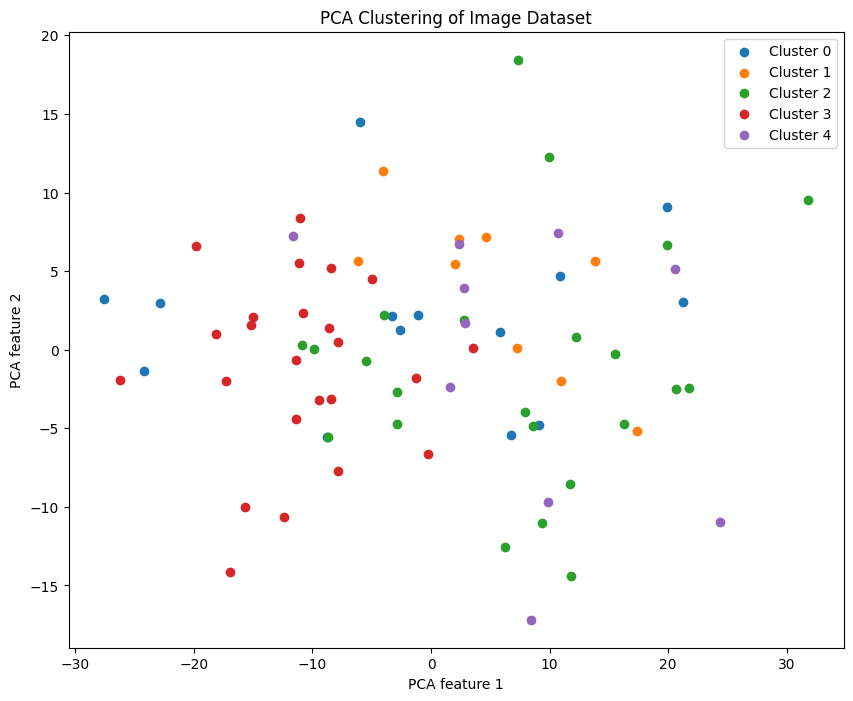

In [ ]:

# Preprocess all images
processed_images = preprocess_images(file_paths, photos_folder_path=photos_folder_path)

# Cluster in batches
batch_size = 20
k_clusters = 5
clusters = cluster_in_batches(processed_images, batch_size, k_clusters)

# PCA and visualization
pca_and_visualize(processed_images, clusters)